In [366]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [367]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [368]:
#importing the dataset

df = pd.read_csv("/content/drive/MyDrive/551 Problem set 1/used_car_dataset.csv")

In [369]:
df.head()

,price,year,manufacturer,condition,cylinders,fuel,odometer,transmission,type,paint_color,F1,F2,F3,F4
0,18219.0,2008.0,ford,excellent,8 cylinders,gas,86238.0,automatic,pickup,black,5823,2.193844,-0.031986,b
1,800.0,2008.0,ford,excellent,6 cylinders,gas,170953.0,automatic,SUV,red,2024,2.133691,0.097985,b
2,23660.0,2016.0,ford,good,8 cylinders,gas,119026.0,automatic,truck,white,294,2.160859,0.046984,c
3,5335.0,2009.0,ford,excellent,4 cylinders,gas,69000.0,manual,sedan,blue,3544,2.114929,-0.110121,c
4,1597.0,1999.0,ford,good,6 cylinders,gas,59130.0,automatic,sedan,blue,1329,1.829625,-0.060615,c


In [370]:
#checking if any feature has null values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9997 entries, 0 to 9996
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         9997 non-null   float64
 1   year          9997 non-null   float64
 2   manufacturer  9997 non-null   object 
 3   condition     9997 non-null   object 
 4   cylinders     9997 non-null   object 
 5   fuel          9997 non-null   object 
 6   odometer      9331 non-null   float64
 7   transmission  9997 non-null   object 
 8   type          9997 non-null   object 
 9   paint_color   9997 non-null   object 
 10  F1            9997 non-null   int64  
 11  F2            9997 non-null   float64
 12  F3            9997 non-null   float64
 13  F4            9997 non-null   object 
dtypes: float64(5), int64(1), object(8)
memory usage: 1.1+ MB




---


**'odometer'**' feature has some null values*


---



In [371]:
#counting number of null values in the 'odometer' column

df["odometer"].isna().sum()

666

In [372]:
#checking basic statistical measures of the dataset

df.describe()

,price,year,odometer,F1,F2,F3
count,9997.000000,9997.000000,9.331000e+03,9997.000000,9997.000000,9997.000000
mean,14262.349305,2009.814144,1.120436e+05,1523.945584,2.225496,0.099283
std,12520.818169,8.862341,8.055942e+04,2090.438720,0.227250,0.100833
min,0.000000,1922.000000,0.000000e+00,4.000000,0.167352,-0.313948
25%,5643.000000,2007.000000,6.653300e+04,311.000000,2.133806,0.029968
50%,10463.000000,2012.000000,1.100000e+05,717.000000,2.255670,0.099648
75%,19464.000000,2015.000000,1.500000e+05,1966.000000,2.362382,0.167504
max,402498.000000,2021.000000,2.074484e+06,36773.000000,2.742570,0.473412




---


##**Key observations from the above data description:**

*   Regarding the 'price' feature:
    *   Minimum is $0
    *   75% (3rd Quartile) of the data is within $20,000 and the maximum price value is ~$4,00,000. Hence there exist some outliers.
  
*   Regarding the 'year' feature:
    * Mimumum year is 1922 while 75% values are more than 2007. So, very small number of values between 1922-2007 present. Majority data is for year 2007 and later.


*   Minimum 'odometer' value is 0


---





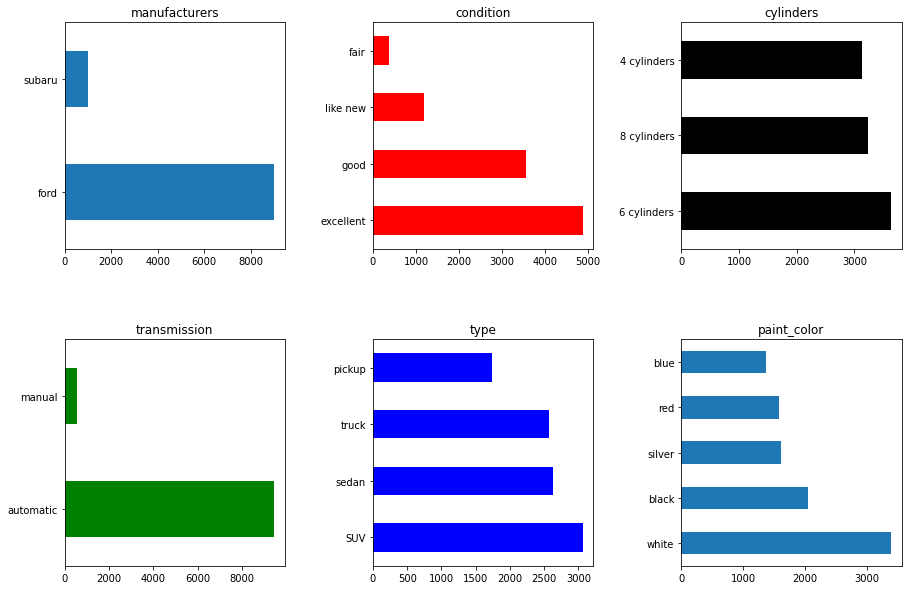

In [373]:
import matplotlib.pyplot as plt
fig,axes = plt.subplots(nrows=2, ncols=3, figsize=(15,10))

df["manufacturer"].value_counts().plot(kind="barh", ax=axes[0,0], title="manufacturers")
df["condition"].value_counts().plot(kind="barh", color='r', ax=axes[0,1], title="condition")
df["cylinders"].value_counts().plot(kind="barh", color='k', ax=axes[0,2], title="cylinders")
df["transmission"].value_counts().plot(kind="barh", color='g', ax=axes[1,0], title="transmission")
df["type"].value_counts().plot(kind="barh", color='b', ax=axes[1,1], title="type")
df["paint_color"].value_counts().plot(kind="barh", ax=axes[1,2], title="paint_color")

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f850d9b7f98>]],
      dtype=object)

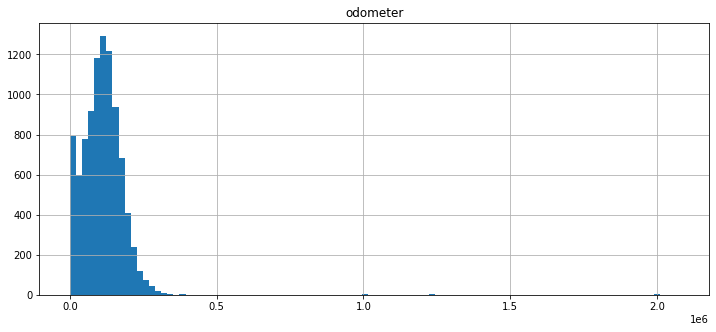

In [374]:
#plotting a histogram for 'odometer'

df.hist(column='odometer', bins=100, figsize=(12,5))



---
As we can infer from the histogram above, besides null values, 'odometer' also has quite a few 0's as values.

Handling the null and 0 values below

---



In [375]:
# We can fill values of odometer=0 with mean or median.
# Here we fill values with the median of the 'odometer' column

odo_median = df['odometer'].median()
odo_mean = df['odometer'].mean()

#filling null values of the 'odometer' feature with median

df['odometer'][df['odometer']==0] = odo_median
df['odometer'].fillna(odo_median, inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [376]:
#re-checking data description after handling null values in the 'odometer' column

df.describe()

,price,year,odometer,F1,F2,F3
count,9997.000000,9997.000000,9.997000e+03,9997.000000,9997.000000,9997.000000
mean,14262.349305,2009.814144,1.122486e+05,1523.945584,2.225496,0.099283
std,12520.818169,8.862341,7.758055e+04,2090.438720,0.227250,0.100833
min,0.000000,1922.000000,1.000000e+00,4.000000,0.167352,-0.313948
25%,5643.000000,2007.000000,7.060500e+04,311.000000,2.133806,0.029968
50%,10463.000000,2012.000000,1.100000e+05,717.000000,2.255670,0.099648
75%,19464.000000,2015.000000,1.469280e+05,1966.000000,2.362382,0.167504
max,402498.000000,2021.000000,2.074484e+06,36773.000000,2.742570,0.473412


In [377]:
#checking if all null values have been taken care of
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9997 entries, 0 to 9996
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         9997 non-null   float64
 1   year          9997 non-null   float64
 2   manufacturer  9997 non-null   object 
 3   condition     9997 non-null   object 
 4   cylinders     9997 non-null   object 
 5   fuel          9997 non-null   object 
 6   odometer      9997 non-null   float64
 7   transmission  9997 non-null   object 
 8   type          9997 non-null   object 
 9   paint_color   9997 non-null   object 
 10  F1            9997 non-null   int64  
 11  F2            9997 non-null   float64
 12  F3            9997 non-null   float64
 13  F4            9997 non-null   object 
dtypes: float64(5), int64(1), object(8)
memory usage: 1.1+ MB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f850d97ca58>]],
      dtype=object)

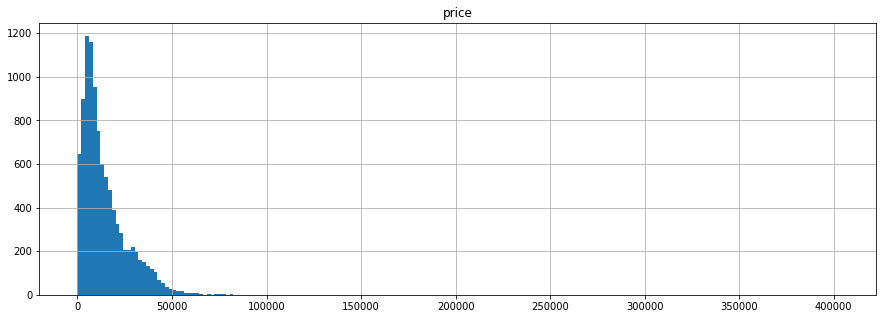

In [378]:
#plotting histogram for price to see the general distribution of values

df.hist(column='price', bins=200, figsize=(15,5))



---
Less number of values that are greater than 100,000.These may be outliers.Also, some values for price are less than 500, which seem to be unlikely for price of a car in 'good' & 'excellent' condition


---




In [379]:
#number of observations with price > $100,000 and < $500

len(df[df['price']>100000]), len(df[df['price']<500])


(2, 143)



---
Since, only 2 values have price more than $100,000, we consider them as outliers and remove them

---




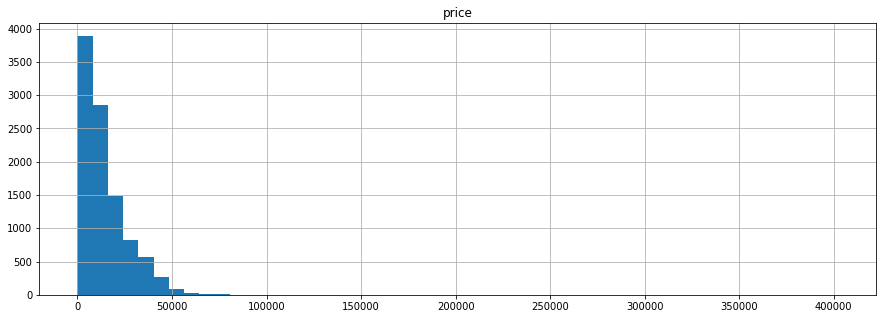

In [380]:
#removing outliers based on price value and plotting the histogram w.r.t price

df.hist(column="price", bins=50, figsize=(15,5))
df= df[df['price']<100000]

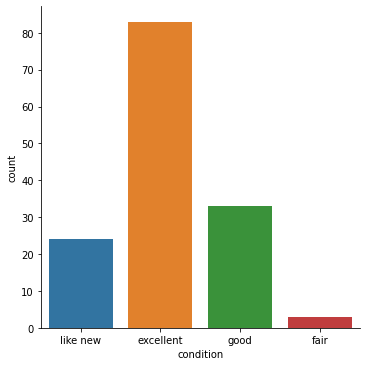

In [381]:
#checking for usability of those observations that have price < 500

df_test = pd.DataFrame()
df_test = df[df['price']<500]
sns.catplot(x='condition', kind='count', data=df_test)



---
As observed from the bar chart above, cars with price < 500 are majorly in 'like new', 'excellent' & 'good' condition. Therefore, these observations seem more of noise than useful data. Hence, we remove these values
---





In [382]:
#removing outliers based on price value

df= df[df['price']>500]

In [383]:
df.describe()

,price,year,odometer,F1,F2,F3
count,9720.000000,9720.000000,9.720000e+03,9720.000000,9720.000000,9720.000000
mean,14608.807407,2009.733745,1.125117e+05,1485.111008,2.223694,0.099288
std,11794.232988,8.929022,7.646998e+04,2069.060831,0.228621,0.100843
min,501.000000,1922.000000,1.000000e+00,4.000000,0.167352,-0.313948
25%,6002.000000,2007.000000,7.149500e+04,306.000000,2.131587,0.029937
50%,10814.000000,2012.000000,1.100000e+05,691.000000,2.254131,0.099656
75%,19946.250000,2015.000000,1.472870e+05,1846.250000,2.361020,0.167363
max,91713.000000,2021.000000,2.074484e+06,36773.000000,2.742570,0.473412


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f850ed9dc50>]],
      dtype=object)

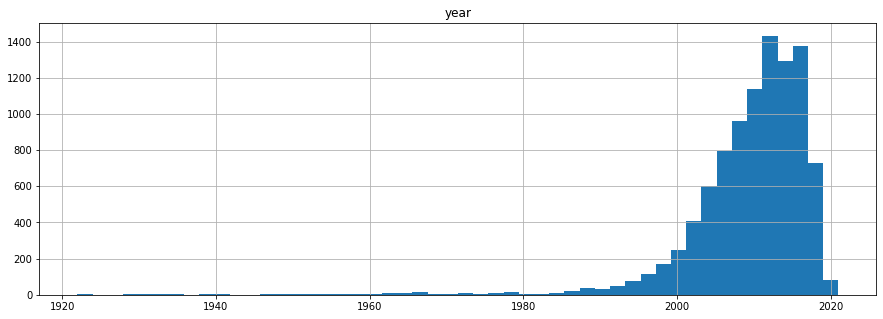

In [384]:
#plotting histogram for year to see the general distribution of values

df.hist(column="year", bins=50, figsize=(15,5))



---
From the statistical description of the dataset and the histogram above, it is clearly evident that majority of data is concentrated above the year 2000

---




array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f850f7f00f0>]],
      dtype=object)

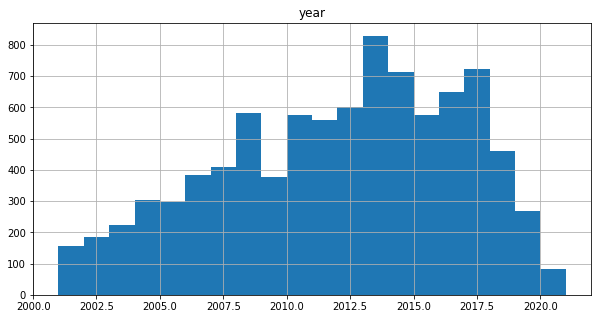

In [385]:
#eliminating observations that have 'year' value less than 2000
df = df[df['year']>2000]

#plotting the histogram for 'year' after modifications
df.hist(column='year', bins=20, figsize=(10,5))



---
Now the values look well distributed


---




In [386]:
df.describe()

,price,year,odometer,F1,F2,F3
count,8960.000000,8960.000000,8.960000e+03,8960.000000,8960.000000,8960.000000
mean,15159.420982,2011.542522,1.104651e+05,1558.218862,2.265761,0.099589
std,11828.071029,4.719404,7.240684e+04,2128.858692,0.147587,0.100546
min,501.000000,2001.000000,1.000000e+00,4.000000,1.708405,-0.308592
25%,6432.000000,2008.000000,6.985150e+04,319.000000,2.165403,0.030488
50%,11493.500000,2012.000000,1.100000e+05,743.000000,2.271967,0.099614
75%,20733.250000,2015.000000,1.450000e+05,2048.500000,2.369794,0.167639
max,85221.000000,2021.000000,2.074484e+06,36773.000000,2.742570,0.473412


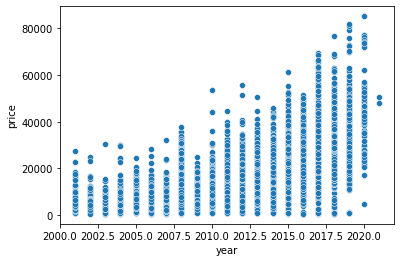

In [387]:
#plotting the relation between price and year

sns.scatterplot(x='year', y='price', data=df)

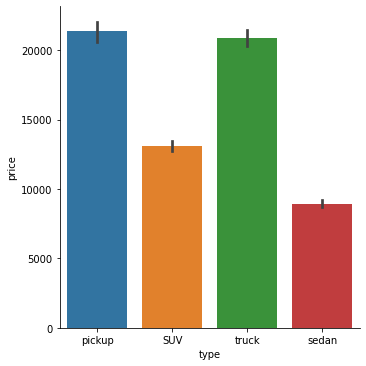

In [388]:
#plotting relation between type of car and price

sns.catplot(x='type', y='price', data=df, kind='bar')

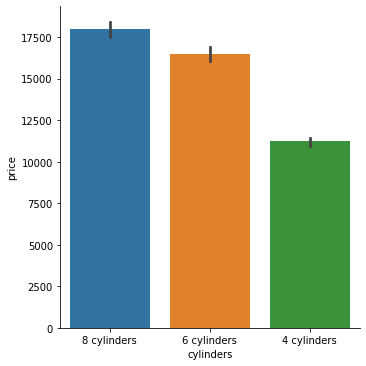

In [389]:
#plotting relation between type of car and price

sns.catplot(x='cylinders', y='price', data=df, kind='bar')

# Finding Correlations between features and target variable(price)

In [390]:
CM = df.corr()
CM["price"].sort_values(ascending=False)

price       1.000000
year        0.635131
F2          0.467447
F1          0.227628
F3          0.106553
odometer   -0.439245
Name: price, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f850d4bb208>,
      dtype=object)

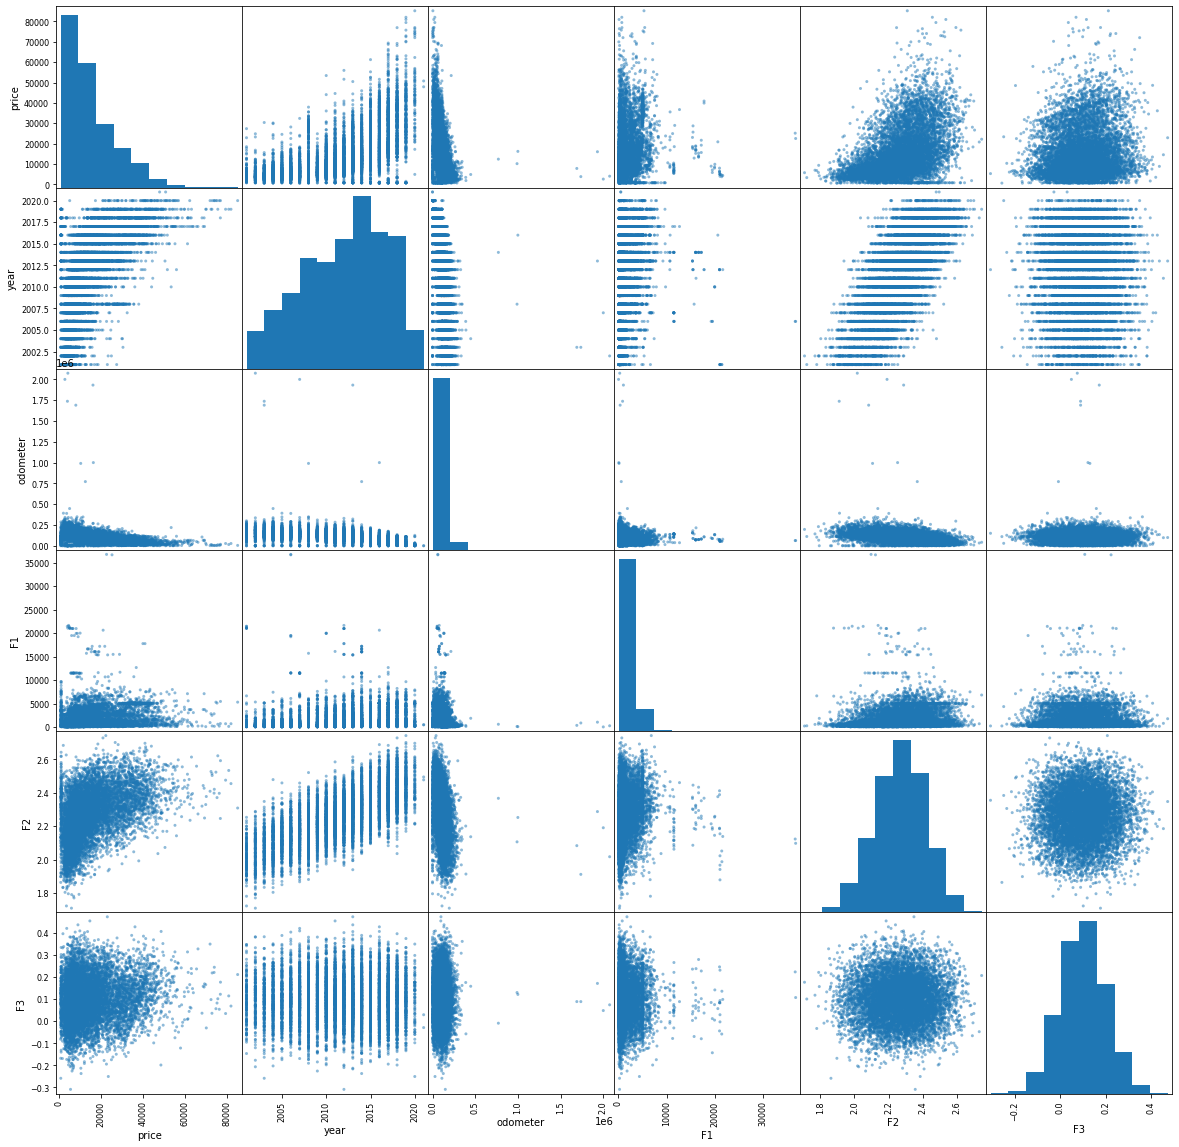

In [391]:
cols = ['price', 'year', 'odometer', 'F1', 'F2', 'F3']
pd.plotting.scatter_matrix(df[cols], figsize=(20,20))

In [392]:
#we add a new column 'odoroot' which is sqrt of odometer values and check its correlation with price

df['odoroot'] = np.sqrt(df['odometer'])
CM = df.corr()
CM['price'].sort_values(ascending=False)

price       1.000000
year        0.635131
F2          0.467447
F1          0.227628
F3          0.106553
odometer   -0.439245
odoroot    -0.536825
Name: price, dtype: float64



---
odoroot has better negative correlation than odometer, so we decide to keep odoroot and drop odometer

---




In [393]:
#dropping odometer

df.drop('odometer', inplace=True, axis=1)

In [394]:
df.describe()

,price,year,F1,F2,F3,odoroot
count,8960.000000,8960.000000,8960.000000,8960.000000,8960.000000,8960.000000
mean,15159.420982,2011.542522,1558.218862,2.265761,0.099589,316.204724
std,11828.071029,4.719404,2128.858692,0.147587,0.100546,102.376199
min,501.000000,2001.000000,4.000000,1.708405,-0.308592,1.000000
25%,6432.000000,2008.000000,319.000000,2.165403,0.030488,264.294343
50%,11493.500000,2012.000000,743.000000,2.271967,0.099614,331.662479
75%,20733.250000,2015.000000,2048.500000,2.369794,0.167639,380.788655
max,85221.000000,2021.000000,36773.000000,2.742570,0.473412,1440.306912


In [395]:
#calculating unique values for 'fuel' feature

df['fuel'].value_counts()

gas    8960
Name: fuel, dtype: int64

In [396]:
#fuel feature can be dropped as it has only one value and hence will not affect the final prediction

df.drop('fuel', axis=1, inplace=True)

In [397]:
#creating a new dataframe (copy of df)

df_en = pd.DataFrame()
df_en = df

In [398]:
df_en.head()

,price,year,manufacturer,condition,cylinders,transmission,type,paint_color,F1,F2,F3,F4,odoroot
0,18219.0,2008.0,ford,excellent,8 cylinders,automatic,pickup,black,5823,2.193844,-0.031986,b,293.663072
1,800.0,2008.0,ford,excellent,6 cylinders,automatic,SUV,red,2024,2.133691,0.097985,b,413.464630
2,23660.0,2016.0,ford,good,8 cylinders,automatic,truck,white,294,2.160859,0.046984,c,345.001449
3,5335.0,2009.0,ford,excellent,4 cylinders,manual,sedan,blue,3544,2.114929,-0.110121,c,262.678511
5,72933.0,2019.0,ford,excellent,6 cylinders,automatic,pickup,black,2483,2.514821,0.036236,a,96.643675


In [399]:
df_en.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8960 entries, 0 to 9996
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         8960 non-null   float64
 1   year          8960 non-null   float64
 2   manufacturer  8960 non-null   object 
 3   condition     8960 non-null   object 
 4   cylinders     8960 non-null   object 
 5   transmission  8960 non-null   object 
 6   type          8960 non-null   object 
 7   paint_color   8960 non-null   object 
 8   F1            8960 non-null   int64  
 9   F2            8960 non-null   float64
 10  F3            8960 non-null   float64
 11  F4            8960 non-null   object 
 12  odoroot       8960 non-null   float64
dtypes: float64(5), int64(1), object(7)
memory usage: 1.3+ MB


In [400]:
#converting object type categorical variables to 'category' type

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

df_en['manufacturer'] = df_en['manufacturer'].astype('category')
df_en['condition'] = df_en['condition'].astype('category')
df_en['cylinders'] = df_en['cylinders'].astype('category')
df_en['transmission'] = df_en['transmission'].astype('category')
df_en['type'] = df_en['type'].astype('category')
df_en['paint_color'] = df_en['paint_color'].astype('category')
df_en['F4'] = df_en['F4'].astype('category')


In [401]:
#assigning each categorical variable cat codes

df_en['manufacturer'] = df_en['manufacturer'].cat.codes.astype('category')
df_en['condition'] = df_en['condition'].cat.codes.astype('category')
df_en['cylinders'] = df_en['cylinders'].cat.codes.astype('category')
df_en['transmission'] = df_en['transmission'].cat.codes.astype('category')
df_en['type'] = df_en['type'].cat.codes.astype('category')
df_en['paint_color'] = df_en['paint_color'].cat.codes.astype('category')
df_en['F4'] = df_en['F4'].cat.codes.astype('category')
df_en.head()

,price,year,manufacturer,condition,cylinders,transmission,type,paint_color,F1,F2,F3,F4,odoroot
0,18219.0,2008.0,0,0,2,0,1,0,5823,2.193844,-0.031986,1,293.663072
1,800.0,2008.0,0,0,1,0,0,2,2024,2.133691,0.097985,1,413.464630
2,23660.0,2016.0,0,2,2,0,3,4,294,2.160859,0.046984,2,345.001449
3,5335.0,2009.0,0,0,0,1,2,1,3544,2.114929,-0.110121,2,262.678511
5,72933.0,2019.0,0,0,1,0,1,0,2483,2.514821,0.036236,0,96.643675


In [402]:
#setting the response variable

y = df_en['price']

In [403]:
#once response variable is set, we drop it from the dataframe to separate input variables from response variable

df_en.drop('price', axis=1, inplace=True)

In [404]:
#resetting the index values

df_en.reset_index(drop=True, inplace=True)

In [405]:
#One_Hot_Encoding function

def encode(col, col_name):
  enc = OneHotEncoder()
  enc_feature = enc.fit_transform(col).toarray() #gives a 2-d array
  n_cols = enc_feature.shape[1]
  l1 = []
  for i in range(n_cols): #iterating on the number of unique values in that categorical column
    for j in enc_feature: #iterating on each enc_feature by row
      l1.append(j[i])
    f = pd.Series(l1)
    col_name1 = col_name + '_' + str(i) #setting column name
    df_en[col_name1] = f #appending encoded columns to the original dataframe
    l1 = []
  
#One_Hot_Encoding each categorical variable one at a time
categorical_cols = ['manufacturer', 'condition', 'cylinders', 'transmission', 'type','paint_color', 'F4']
for i in categorical_cols:
  encode(df_en[[i]], i)
df_en

,year,manufacturer,condition,cylinders,transmission,type,paint_color,F1,F2,F3,F4,odoroot,manufacturer_0,manufacturer_1,condition_0,condition_1,condition_2,condition_3,cylinders_0,cylinders_1,cylinders_2,transmission_0,transmission_1,type_0,type_1,type_2,type_3,paint_color_0,paint_color_1,paint_color_2,paint_color_3,paint_color_4,F4_0,F4_1,F4_2
0,2008.0,0,0,2,0,1,0,5823,2.193844,-0.031986,1,293.663072,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2008.0,0,0,1,0,0,2,2024,2.133691,0.097985,1,413.464630,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,2016.0,0,2,2,0,3,4,294,2.160859,0.046984,2,345.001449,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,2009.0,0,0,0,1,2,1,3544,2.114929,-0.110121,2,262.678511,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2019.0,0,0,1,0,1,0,2483,2.514821,0.036236,0,96.643675,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8955,2017.0,0,2,0,0,2,3,3588,2.202934,0.212334,1,350.159963,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
8956,2002.0,0,3,1,0,2,3,157,2.147843,0.070923,0,331.662479,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
8957,2017.0,0,0,1,0,0,4,1499,2.392569,0.094751,2,229.218237,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
8958,2013.0,0,2,0,0,0,0,180,2.269796,0.129762,0,443.846820,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [406]:
#splitting the variables and output in x and y respectively

categorical_cols = ['manufacturer', 'condition', 'cylinders', 'transmission', 'type','paint_color', 'F4']
x = df_en.drop(categorical_cols, axis=1) #dropping original categorical columns since we have encoded ones
x.shape, y.shape

((8960, 28), (8960,))

In [407]:
#splitting dataset into training and test data

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=30)

In [408]:
#Performing the linear regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, max_error, mean_absolute_error

regressor = LinearRegression()
regressor.fit(x_train, y_train) #fitting the model

y_pred = regressor.predict(x_test) #predicting response variable

LRrmse = np.sqrt(mean_squared_error(y_test, y_pred)) #Root Mean Squared Error
LRr2 = r2_score(y_test, y_pred) #R-squared
LRmae = mean_absolute_error(y_test, y_pred) #Mean Absolute Error

print(f'rmse = {LRrmse}\nr2 = {LRr2}\nmae = {LRmae}')

rmse = 6463.172978671518
r2 = 0.6924176023469547
mae = 4364.590742411931


In [409]:
#Performing the Ridge regression

from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error, max_error, mean_absolute_error

regressor = Ridge(alpha=0.05, normalize=True)
regressor.fit(x_train, y_train) #fitting the model

y_pred = regressor.predict(x_test) #predicting response variable

Rrmse = np.sqrt(mean_squared_error(y_test, y_pred)) #Root Mean Squared Error
Rr2 = r2_score(y_test, y_pred) #R-squared
Rmae = mean_absolute_error(y_test, y_pred) #Mean Absolute Error

print(f'rmse = {Rrmse}\nr2 = {Rr2}\nmae = {Rmae}')

rmse = 6487.219339222091
r2 = 0.6901246121455351
mae = 4365.21151699248


In [410]:
#Performing the LASSO regression

from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_squared_error, max_error, mean_absolute_error

regressor = Lasso(alpha=5)
regressor.fit(x_train, y_train) #fitting the model

y_pred = regressor.predict(x_test) #predicting response variable

Lrmse = np.sqrt(mean_squared_error(y_test, y_pred)) #Root Mean Squared Error
Lr2 = r2_score(y_test, y_pred) #R-squared
Lmae = mean_absolute_error(y_test, y_pred) #Mean Absolute Error

print(f'rmse = {Lrmse}\nr2 = {Lr2}\nmae = {Lmae}')

rmse = 6463.509017385847
r2 = 0.6923856173511088
mae = 4361.54917778975


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


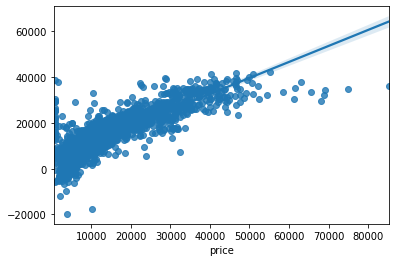

In [411]:
#Plotting the linear regression

sns.regplot(y_test, y_pred)

In [412]:
coeff = pd.DataFrame(x_train.columns)

coeff['coefficients'] = pd.Series(regressor.coef_)
coeff['abs_coeff'] = coeff['coefficients'].abs()
coeff.sort_values('abs_coeff', ascending=False)

,0,coefficients,abs_coeff
3,F3,1.133193e+04,1.133193e+04
18,type_2,-5.631741e+03,5.631741e+03
11,cylinders_0,-5.238851e+03,5.238851e+03
14,transmission_0,-3.322282e+03,3.322282e+03
19,type_3,3.322253e+03,3.322253e+03
5,manufacturer_0,-2.996980e+03,2.996980e+03
17,type_1,2.882327e+03,2.882327e+03
16,type_0,-2.878224e+03,2.878224e+03
8,condition_1,-1.414372e+03,1.414372e+03
13,cylinders_2,1.352176e+03,1.352176e+03
